In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Testing with GradientBoost from scikit learn

In [32]:
df = pd.read_csv('../dataset/Australian_Grand_Prix_2025_data.csv')

In [33]:
df

,driver_number,year,event,team,FP1_sector1_time,FP1_sector2_time,FP1_sector3_time,FP1_total_time,FP2_sector1_time,FP2_sector2_time,FP2_sector3_time,FP2_total_time,FP3_sector1_time,FP3_sector2_time,FP3_sector3_time,FP3_total_time,Q_sector1_time,Q_sector2_time,Q_sector3_time,Q_total_time,R_sector1_time,R_sector2_time,R_sector3_time,R_total_time,race_position
0,1,2025,Australian Grand Prix,Red Bull Racing,36.635523,22.741714,44.779777,104.157015,35.356863,22.138545,42.903368,100.398777,39.676611,23.485666,46.045307,109.207585,38.196941,20.523529,36.088000,94.808470,36.825607,23.512403,47.040719,107.378729,2
1,4,2025,Australian Grand Prix,McLaren,38.422000,21.734285,43.457222,103.613507,34.548466,22.138633,42.120407,98.807507,39.379200,23.068526,45.949666,108.397392,39.252650,20.986750,37.834642,98.074042,37.191232,23.721087,46.479192,107.391512,1
2,5,2025,Australian Grand Prix,Kick Sauber,39.730545,24.033818,47.448833,111.213196,35.560310,22.132275,44.491461,102.184047,39.541833,23.540666,49.316133,112.398633,41.563923,20.917692,41.165888,103.647504,36.537272,23.252911,47.801733,107.591917,R
3,6,2025,Australian Grand Prix,Racing Bulls,36.799440,20.720760,45.530863,103.051063,35.530300,21.476900,43.218037,100.225237,40.486055,22.123166,46.109428,108.718650,43.230000,19.058416,37.759750,100.048166,NaN,NaN,NaN,0.000000,R
4,7,2025,Australian Grand Prix,Alpine,37.256750,22.591210,45.592166,105.440127,34.896433,21.525066,40.737925,97.159425,42.961333,23.574222,49.574500,116.110055,41.586866,19.894000,39.055090,100.535957,NaN,NaN,NaN,0.000000,R
5,10,2025,Australian Grand Prix,Alpine,34.497333,22.101181,44.111000,100.709515,35.812733,21.967666,41.078666,98.859066,40.217045,26.522727,46.923050,113.662822,40.880300,19.710450,38.077266,98.668016,36.575125,23.519842,47.669210,107.764177,11
6,12,2025,Australian Grand Prix,Mercedes,36.205913,22.138958,44.056428,102.401299,34.362800,21.651741,44.054500,100.069041,38.109900,23.190150,42.067076,103.367126,37.631888,20.711555,38.636285,96.979730,36.392589,23.503333,47.519421,107.415343,4
7,14,2025,Australian Grand Prix,Aston Martin,32.323739,19.935391,42.472950,94.732080,32.146333,20.468000,40.508958,93.123291,35.639909,20.411090,46.077944,102.128944,41.518461,19.653923,37.731750,98.904134,36.027870,21.895437,46.217875,104.141183,R
8,16,2025,Australian Grand Prix,Ferrari,37.795700,21.196000,43.399823,102.391523,34.659937,21.081312,42.372724,98.113974,42.327090,23.118000,50.939111,116.384202,38.932550,19.641550,39.249923,97.824023,36.446892,23.270561,47.955543,107.672998,8
9,18,2025,Australian Grand Prix,Aston Martin,36.306450,22.178947,47.387529,105.872926,33.774571,20.669500,39.309791,93.753863,37.118000,21.986545,43.841333,102.945878,38.534466,19.763533,37.512500,95.810499,36.424017,23.536508,47.605614,107.566140,6


In [34]:
X = df.loc[:, ~(df.columns.str.upper().str.startswith('R'))].drop(columns=['team', 'year', 'event'])
y = df['R_total_time']

display(X.head())
display(y.head())

,driver_number,FP1_sector1_time,FP1_sector2_time,FP1_sector3_time,FP1_total_time,FP2_sector1_time,FP2_sector2_time,FP2_sector3_time,FP2_total_time,FP3_sector1_time,FP3_sector2_time,FP3_sector3_time,FP3_total_time,Q_sector1_time,Q_sector2_time,Q_sector3_time,Q_total_time
0,1,36.635523,22.741714,44.779777,104.157015,35.356863,22.138545,42.903368,100.398777,39.676611,23.485666,46.045307,109.207585,38.196941,20.523529,36.088000,94.808470
1,4,38.422000,21.734285,43.457222,103.613507,34.548466,22.138633,42.120407,98.807507,39.379200,23.068526,45.949666,108.397392,39.252650,20.986750,37.834642,98.074042
2,5,39.730545,24.033818,47.448833,111.213196,35.560310,22.132275,44.491461,102.184047,39.541833,23.540666,49.316133,112.398633,41.563923,20.917692,41.165888,103.647504
3,6,36.799440,20.720760,45.530863,103.051063,35.530300,21.476900,43.218037,100.225237,40.486055,22.123166,46.109428,108.718650,43.230000,19.058416,37.759750,100.048166
4,7,37.256750,22.591210,45.592166,105.440127,34.896433,21.525066,40.737925,97.159425,42.961333,23.574222,49.574500,116.110055,41.586866,19.894000,39.055090,100.535957


0    107.378729
1    107.391512
2    107.591917
3      0.000000
4      0.000000
Name: R_total_time, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\khanh\anaconda3\envs\DDSC\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:46:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [36]:
df['predicted_total_time'] = model.predict(X)

results = df[['driver_number', 'team', 'race_position', 'R_total_time', 'predicted_total_time']].copy()
results['predicted_position'] = results['predicted_total_time'].rank().astype(int)
results['difference'] = results['predicted_total_time'] - results['R_total_time']
results = results.sort_values('predicted_total_time')
results

,driver_number,team,race_position,R_total_time,predicted_total_time,predicted_position,difference
3,6,Racing Bulls,R,0.000000,0.003200,1,0.003200
4,7,Alpine,R,0.000000,0.016410,2,0.016410
16,55,Williams,R,0.000000,0.045767,3,0.045767
17,63,Mercedes,3,107.493187,75.654884,4,-31.838303
7,14,Aston Martin,R,104.141183,104.144470,5,0.003287
15,44,Ferrari,10,107.697774,104.279709,6,-3.418065
18,81,McLaren,9,105.996675,106.000694,7,0.004019
13,30,Red Bull Racing,R,106.801382,106.806656,8,0.005274
6,12,Mercedes,4,107.415343,107.415543,9,0.000200
11,23,Williams,5,107.540984,107.549065,10,0.008081


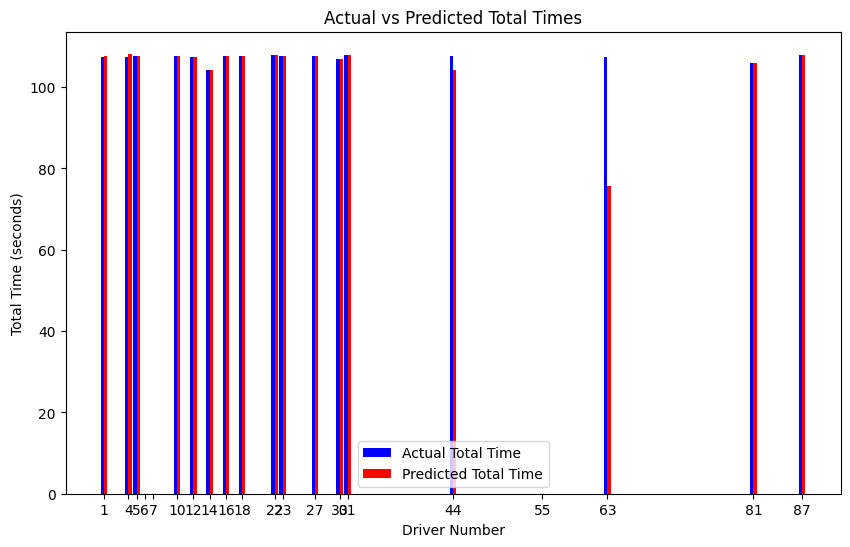

In [39]:
# Bar chart of actual vs predicted total times
plt.figure(figsize=(10, 6))
plt.bar(results['driver_number'] - 0.2, results['R_total_time'], width=0.4, label='Actual Total Time', color='b')
plt.bar(results['driver_number'] + 0.2, results['predicted_total_time'], width=0.4, label='Predicted Total Time', color='r')
plt.xlabel('Driver Number') 
plt.ylabel('Total Time (seconds)')
plt.title('Actual vs Predicted Total Times')
plt.xticks(results['driver_number'])
plt.legend()
plt.show()


In [37]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 256.5366
Root Mean Squared Error (RMSE): 16.0168
Mean Absolute Error (MAE): 9.1063
R² Score: -15722.7419


In [ ]:
import machine
machine.learn()
machine.predict()
result = 'good' 

ModuleNotFoundError: No module named 'machine'